# Empirical Project 10: Characteristics of banking systems around the world
**(dataset: World Bank Global Financial Development Database)**

***Group 5: Armand Hubler, Marco Celati, Shamil Mukhamedov, Wilrick Dong, Yan Bernard***


In [ ]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import linregress
import matplotlib.pyplot as plt
import pingouin as pg
from scipy.stats import mstats

Import df

In [2]:
df = pd.read_excel(
    Path("../data/GlobalFinancialDevelopmentDatabaseJune2017.xlsx"),
    sheet_name="Data - June 2016",
)
df.head()

,ISO3,ISO2,IMF code,Country,Region,Income Group,Year,GFDD.AI.01,GFDD.AI.02,GFDD.AI.03,...,GFDD.OI.18,GFDD.OI.19,GFDD.OM.01,GFDD.OM.02,GFDD.OE.01,GFDD.OE.02,NY.GDP.MKTP.CD,NY.GDP.PCAP.KD,NY.GNP.MKTP.CD,SP.POP.TOTL
0,AFG,AF,512.0,Afghanistan,South Asia,Low income,1960,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,540000000.0,NaN,550000000.0,9000000.0
1,AFG,AF,512.0,Afghanistan,South Asia,Low income,1961,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,550000000.0,NaN,560000000.0,9200000.0
2,AFG,AF,512.0,Afghanistan,South Asia,Low income,1962,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,550000000.0,NaN,560000000.0,9300000.0
3,AFG,AF,512.0,Afghanistan,South Asia,Low income,1963,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,750000000.0,NaN,770000000.0,9500000.0
4,AFG,AF,512.0,Afghanistan,South Asia,Low income,1964,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,800000000.0,NaN,820000000.0,9700000.0


Rename columns

In [3]:
# Dictionary mapping old codes to descriptive column names
column_names = {
    "GFDD.AI.01": "bank_accounts_per_1k_adults",
    "GFDD.AI.02": "bank_branches_per_100k_adults",
    "GFDD.AI.03": "firms_with_bank_loan_percent",
    "GFDD.AI.04": "small_firms_with_bank_loan_percent",
    "GFDD.AI.05": "adults_with_account_percent",
    "GFDD.AI.06": "saved_at_financial_institution_percent",
    "GFDD.AI.07": "loan_from_financial_institution_percent",
    "GFDD.AI.08": "account_used_for_business_percent",
    "GFDD.AI.09": "account_for_gov_payments_percent",
    "GFDD.AI.10": "account_for_remittances_percent",
    "GFDD.AI.11": "account_for_wages_percent",
    "GFDD.AI.12": "saved_any_money_percent",
    "GFDD.AI.13": "saved_using_savings_club_percent",
    "GFDD.AI.14": "loan_any_source_percent",
    "GFDD.AI.15": "loan_from_private_lender_percent",
    "GFDD.AI.16": "loan_from_employer_percent",
    "GFDD.AI.17": "loan_through_store_credit_percent",
    "GFDD.AI.18": "loan_from_family_friends_percent",
    "GFDD.AI.19": "checks_used_for_payments_percent",
    "GFDD.AI.20": "credit_card_ownership_percent",
    "GFDD.AI.21": "debit_card_ownership_percent",
    "GFDD.AI.22": "electronic_payments_percent",
    "GFDD.AI.23": "mobile_phone_for_bills_percent",
    "GFDD.AI.24": "mobile_phone_for_money_transfer_percent",
    "GFDD.AI.25": "atms_per_100k_adults",
    "GFDD.AI.26": "monthly_transactions_percent",
    "GFDD.AI.27": "firms_with_checking_savings_account_percent",
    "GFDD.AI.28": "firms_using_banks_for_investment_percent",
    "GFDD.AI.29": "firms_using_banks_for_working_capital_percent",
    "GFDD.AI.30": "loans_requiring_collateral_percent",
    "GFDD.AI.31": "value_of_collateral_percent_of_loan",
    "GFDD.AI.32": "firms_not_needing_loan_percent",
    "GFDD.AI.33": "rejected_loan_applications_percent",
    "GFDD.AI.34": "investment_financed_by_banks_percent",
    "GFDD.AI.35": "working_capital_financed_by_banks_percent",
    "GFDD.AI.36": "firms_identifying_finance_constraint_percent",
    "GFDD.AM.01": "value_traded_excluding_top_10_percent",
    "GFDD.AM.02": "market_cap_excluding_top_10_percent",
    "GFDD.AM.03": "nonfinancial_corporate_bonds_percent",
    "GFDD.AM.04": "investment_financed_by_equity_percent",
    "GFDD.DI.01": "private_credit_to_gdp_percent",
    "GFDD.DI.02": "deposit_money_banks_assets_to_gdp_percent",
    "GFDD.DI.03": "nonbank_financial_institutions_assets_to_gdp_percent",
    "GFDD.DI.04": "deposit_money_banks_assets_percent",
    "GFDD.DI.05": "liquid_liabilities_to_gdp_percent",
    "GFDD.DI.06": "central_bank_assets_to_gdp_percent",
    "GFDD.DI.07": "mutual_fund_assets_to_gdp_percent",
    "GFDD.DI.08": "financial_system_deposits_to_gdp_percent",
    "GFDD.DI.09": "life_insurance_premiums_to_gdp_percent",
    "GFDD.DI.10": "nonlife_insurance_premiums_to_gdp_percent",
    "GFDD.DI.11": "insurance_assets_to_gdp_percent",
    "GFDD.DI.12": "private_credit_and_other_financial_institutions_to_gdp",
    "GFDD.DI.13": "pension_fund_assets_to_gdp_percent",
    "GFDD.DI.14": "domestic_credit_to_private_sector_percent",
    "GFDD.DM.01": "stock_market_capitalization_to_gdp_percent",
    "GFDD.DM.02": "stock_market_value_traded_to_gdp_percent",
    "GFDD.DM.03": "domestic_private_debt_securities_to_gdp_percent",
    "GFDD.DM.04": "domestic_public_debt_securities_to_gdp_percent",
    "GFDD.DM.05": "international_private_debt_securities_to_gdp_percent",
    "GFDD.DM.06": "international_public_debt_securities_to_gdp_percent",
    "GFDD.DM.07": "total_international_debt_securities_to_gdp_percent",
    "GFDD.DM.08": "gross_portfolio_equity_liabilities_to_gdp_percent",
    "GFDD.DM.09": "gross_portfolio_equity_assets_to_gdp_percent",
    "GFDD.DM.10": "gross_portfolio_debt_liabilities_to_gdp_percent",
    "GFDD.DM.11": "gross_portfolio_debt_assets_to_gdp_percent",
    "GFDD.DM.12": "syndicated_loan_issuance_volume_to_gdp_percent",
    "GFDD.DM.13": "corporate_bond_issuance_volume_to_gdp_percent",
    "GFDD.DM.14": "syndicated_loan_average_maturity_years",
    "GFDD.DM.15": "corporate_bond_average_maturity_years",
    "GFDD.EI.01": "bank_net_interest_margin_percent",
    "GFDD.EI.02": "bank_lending_deposit_spread",
    "GFDD.EI.03": "bank_noninterest_income_percent",
    "GFDD.EI.04": "bank_overhead_costs_percent",
    "GFDD.EI.05": "bank_return_on_assets_percent_after_tax",
    "GFDD.EI.06": "bank_return_on_equity_percent_after_tax",
    "GFDD.EI.07": "bank_cost_to_income_ratio_percent",
    "GFDD.EI.08": "credit_to_gov_and_state_enterprises_to_gdp_percent",
    "GFDD.EI.09": "bank_return_on_assets_percent_before_tax",
    "GFDD.EI.10": "bank_return_on_equity_percent_before_tax",
    "GFDD.EM.01": "stock_market_turnover_ratio_percent",
    "GFDD.SI.01": "bank_z_score",
    "GFDD.SI.02": "nonperforming_loans_to_gross_loans_percent",
    "GFDD.SI.03": "bank_capital_to_total_assets_percent",
    "GFDD.SI.04": "bank_credit_to_deposits_percent",
    "GFDD.SI.05": "bank_regulatory_capital_to_risk_assets_percent",
    "GFDD.SI.06": "liquid_assets_to_deposits_percent",
    "GFDD.SI.07": "provisions_to_nonperforming_loans_percent",
    "GFDD.SM.01": "stock_price_volatility",
    "GFDD.OI.01": "bank_concentration_percent",
    "GFDD.OI.02": "bank_deposits_to_gdp_percent",
    "GFDD.OI.03": "h_statistic",
    "GFDD.OI.04": "lerner_index",
    "GFDD.OI.05": "boone_indicator",
    "GFDD.OI.06": "5_bank_asset_concentration_percent",
    "GFDD.OI.07": "liquid_liabilities_usd_millions",
    "GFDD.OI.08": "loans_from_nonresident_banks_net_to_gdp_percent",
    "GFDD.OI.09": "loans_from_nonresident_banks_outstanding_to_gdp_percent",
    "GFDD.OI.10": "external_loans_deposits_to_banking_sector_percent",
    "GFDD.OI.11": "external_loans_deposits_to_nonbanking_sector_percent",
    "GFDD.OI.12": "external_loans_deposits_to_all_sectors_percent",
    "GFDD.OI.13": "remittance_inflows_to_gdp_percent",
    "GFDD.OI.14": "consolidated_foreign_claims_to_gdp_percent",
    "GFDD.OI.15": "foreign_banks_among_total_percent",
    "GFDD.OI.16": "foreign_bank_assets_among_total_assets_percent",
    "GFDD.OI.17": "global_leasing_volume_to_gdp_percent",
    "GFDD.OI.18": "factoring_volume_to_gdp_percent",
    "GFDD.OI.19": "banking_crisis_dummy",
    "GFDD.OM.01": "listed_companies_per_million_people",
    "GFDD.OM.02": "stock_market_return_year_on_year_percent",
    "GFDD.OE.01": "cpi_december_2010_index",
    "GFDD.OE.02": "cpi_average_2010_index",
    "NY.GDP.MKTP.CD": "gdp_current_usd",
    "NY.GDP.PCAP.KD": "gdp_per_capita_constant_2005_usd",
    "NY.GNP.MKTP.CD": "gnp_current_usd",
    "SP.POP.TOTL": "population_total"
}

df = df.rename(columns=column_names)

Simple Functions

Generating plots for feature: bank_z_score


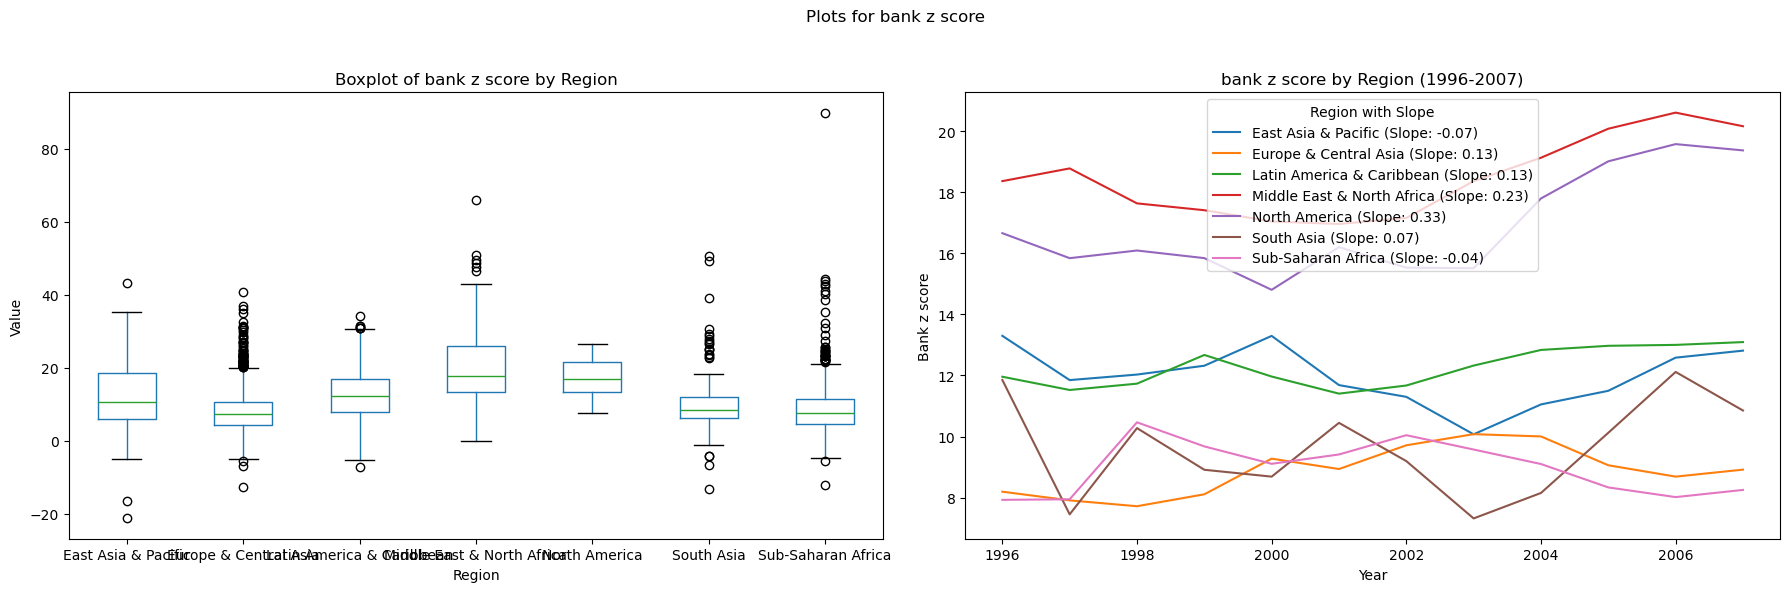

Generating plots for feature: private_credit_to_gdp_percent


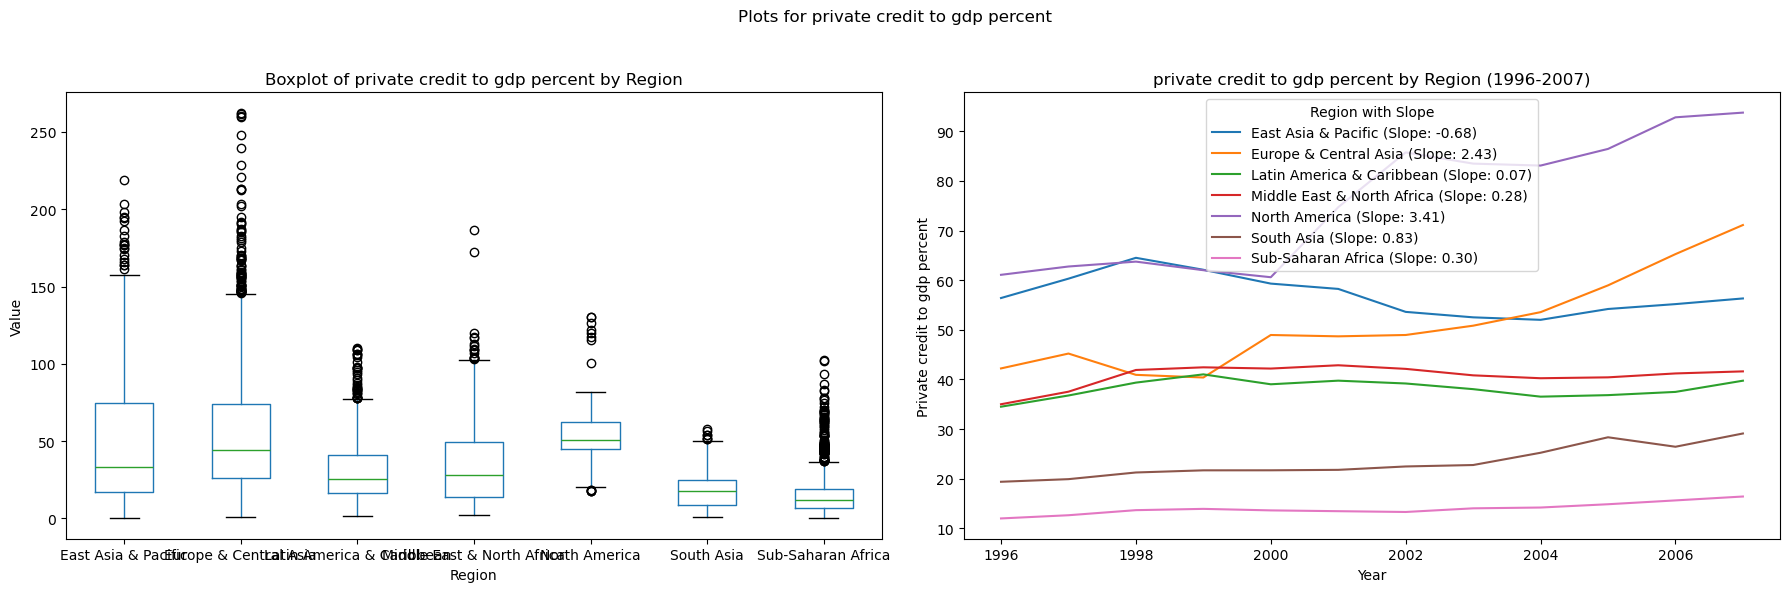

Generating plots for feature: deposit_money_banks_assets_to_gdp_percent


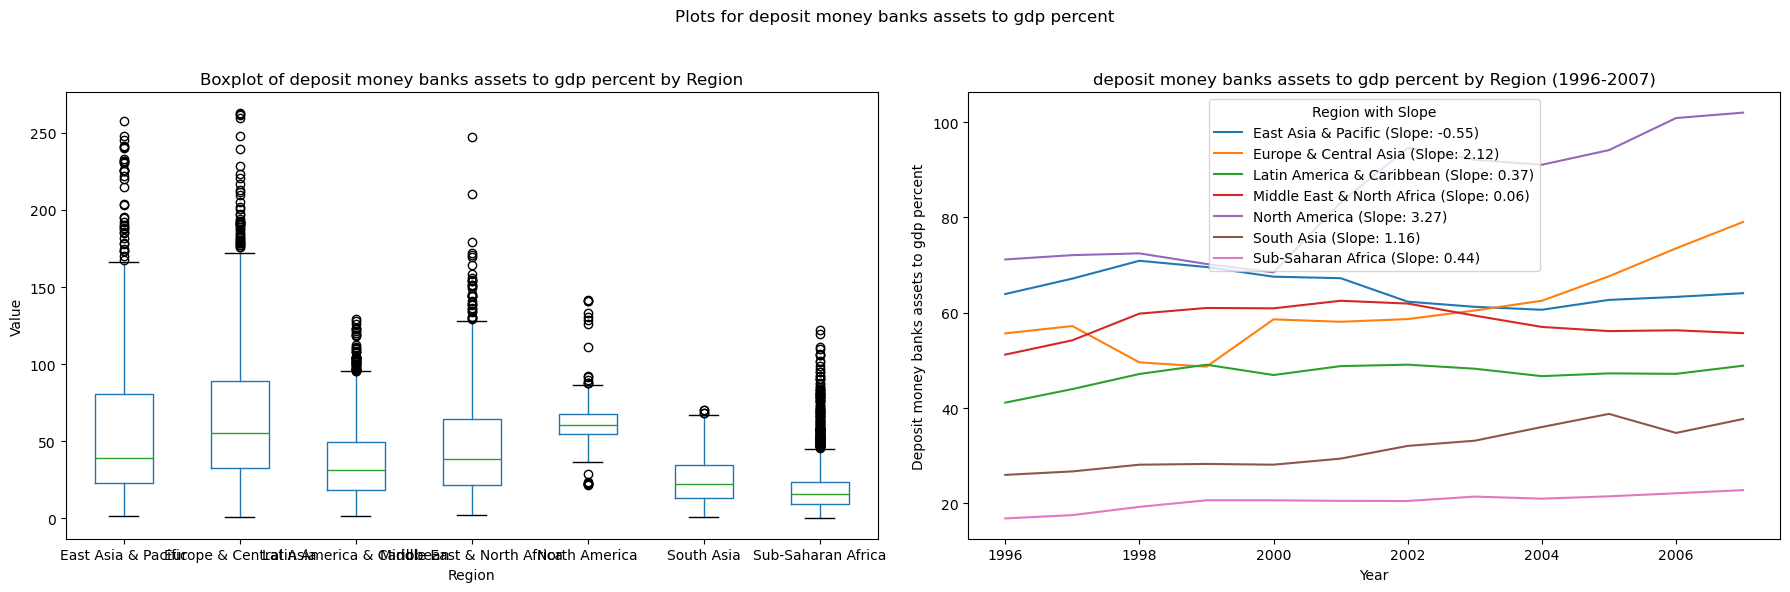

Generating plots for feature: bank_regulatory_capital_to_risk_assets_percent


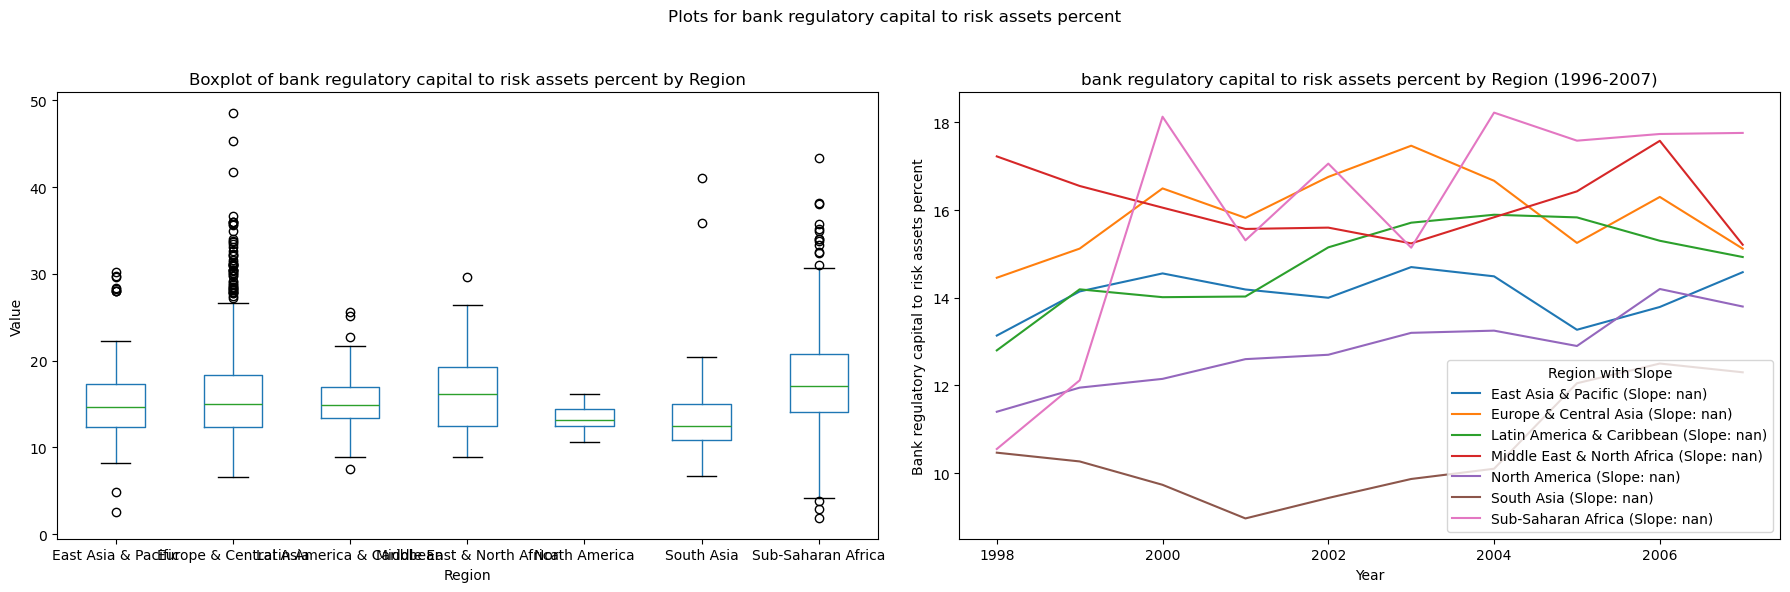

In [11]:
def melt_dataframe(df, id_vars, indicators):
    """
    Melts a dataframe based on provided id_vars and indicators.

    Parameters:
        df (pd.DataFrame): The input dataframe.
        id_vars (list): The columns to keep as identifiers.
        indicators (list): The columns to melt into a single 'indicator' column.

    Returns:
        pd.DataFrame: Melted dataframe.
    """
    return df.melt(
        id_vars=id_vars, value_vars=indicators, var_name="indicator"
    )

def box_plot_by_region(df, category_col, value_col, feature_name):
    """
    Generates a box plot for a specified category column.

    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        category_col (str): The column to group by (e.g., 'Region').
        value_col (str): The column with numeric values for the box plot.
        feature_name (str): The feature name to include in the title.
    """
    plt.figure(figsize=(12, 8))
    df.boxplot(column=value_col, by=category_col, grid=False)
    plt.title(f'Boxplot of {feature_name.replace("_", " ")} by {category_col}')
    plt.suptitle('')
    plt.xlabel(category_col)
    plt.ylabel(feature_name.replace("_", " ").capitalize())
    plt.xticks(rotation=45)
    plt.show()

def plot_line_chart_by_region(df, category_col, value_col, year_col, feature_name, start_year, end_year):
    """
    Plots a line chart by category for a specific feature over a range of years.

    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        category_col (str): The column to group by (e.g., 'Region').
        value_col (str): The column with numeric values for plotting.
        year_col (str): The column representing the year.
        feature_name (str): The feature name to plot.
        start_year (int): The starting year for the plot.
        end_year (int): The ending year for the plot.
    """
    df = df[(df[year_col] >= start_year) & (df[year_col] <= end_year)]
    df_feature = df[df['indicator'] == feature_name]
    
    df_grouped = df_feature.groupby([year_col, category_col])[value_col].mean().unstack()
    
    plt.figure(figsize=(12, 8))
    
    for category in df_grouped.columns:
        x = df_grouped.index.astype(int)
        y = df_grouped[category]
        slope, intercept, _, _, _ = linregress(x, y)
        
        plt.plot(x, y, label=f"{category} (Slope: {slope:.2f})")
    
    plt.title(f'{feature_name.replace("_", " ")} by {category_col} ({start_year}-{end_year})')
    plt.xlabel(year_col.capitalize())
    plt.ylabel(feature_name.replace("_", " ").capitalize())
    plt.legend(title=f'{category_col} with Slope')
    plt.show()

def create_plots_per_feature(df, indicators, id_vars, value_col, category_col, year_col, start_year, end_year):
    """
    Generates plots for each feature (indicator) grouped by category.

    Parameters:
        df (pd.DataFrame): The input dataframe.
        indicators (list): The features (indicators) to plot.
        id_vars (list): The columns to keep as identifiers.
        value_col (str): The column with numeric values for plotting.
        category_col (str): The column to group by (e.g., 'Region').
        year_col (str): The column representing the year.
        start_year (int): The starting year for the plots.
        end_year (int): The ending year for the plots.
    """
    for feature in indicators:
        print(f"Generating plots for feature: {feature}")
        df_melted = melt_dataframe(df, id_vars, [feature])

        # Create subplots for box plot and line chart
        fig, axes = plt.subplots(1, 2, figsize=(18, 6))

        # Box plot
        df_melted.boxplot(column=value_col, by=category_col, grid=False, ax=axes[0])
        axes[0].set_title(f'Boxplot of {feature.replace("_", " ")} by {category_col}')
        axes[0].set_xlabel(category_col)
        axes[0].set_ylabel(value_col.replace("_", " ").capitalize())

        # Line chart
        df_filtered = df_melted[(df_melted[year_col] >= start_year) & (df_melted[year_col] <= end_year)]
        df_feature = df_filtered[df_filtered['indicator'] == feature]
        df_grouped = df_feature.groupby([year_col, category_col])[value_col].mean().unstack()
        
        for category in df_grouped.columns:
            x = df_grouped.index.astype(int)
            y = df_grouped[category]
            slope, intercept, _, _, _ = linregress(x, y)
            axes[1].plot(x, y, label=f"{category} (Slope: {slope:.2f})")

        axes[1].set_title(f'{feature.replace("_", " ")} by {category_col} ({start_year}-{end_year})')
        axes[1].set_xlabel(year_col.capitalize())
        axes[1].set_ylabel(feature.replace("_", " ").capitalize())
        axes[1].legend(title=f'{category_col} with Slope')

        # Adjust layout
        plt.suptitle(f"Plots for {feature.replace('_', ' ')}")
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()


id_vars = ['Country', 'Year', 'Region']
indicators = ['bank_z_score', 'private_credit_to_gdp_percent', 
              'deposit_money_banks_assets_to_gdp_percent', 'bank_regulatory_capital_to_risk_assets_percent']
value_col = 'value'
category_col = 'Region'
year_col = 'Year'

create_plots_per_feature(df, indicators, id_vars, value_col, category_col, year_col, 1996, 2007)


## Interpratations:

In this section we are having an overview of key features that we will futther analyse. 

- Bank Z-Score:
    - Definition: 
        - It captures the probability of default of a country's commercial banking system. Z-score compares the buffer of a country's commercial banking system (capitalization and returns) with the volatility of those returns.
    - Analysis: 
        - Boxplot highlights a few positive outliers for Europe, South Asia, and Sub-Saharan Africa.
        - Despite looking at a long period, North America and the Middle East's banks appears to be relatively more stable than the rest. Moreover, they also have the highest slope, 0.33 and 0.23 respectively, implying more improvements. 

- private_credit_to_gdp_percent:
    - Definition:
        - The financial resources provided to the private sector by domestic money banks as a share of GDP. Domestic money banks comprise commercial banks and other financial institutions that accept transferable deposits, such as demand deposits.
    - Analysis:
        - Boxplot highlights many outliers (outside the IQR) for all regions except North America and South Asia. 
        - The private sectors appears to be further supported in North America and Europe. There has been an important increase in North America from 1996 to 2007 with a slope of 3.41.

- deposit_money_banks_assets_to_gdp_percent:
    - Definition: 
        - Total assets held by deposit money banks as a share of GDP.
    - Analysis: 
        - Over the 1996-2007 period, all regions had experienced a strong variability in their banks' assets to GDP%. 
        - Once again, North America and Europe are outperforming other regions and at the same time are also the ones experiencing the highest increase during that period.  

- bank_regulatory_capital_to_risk_assets_percent:
    - Definition:
        - The capital adequacy of deposit takers. It is a ratio of total regulatory capital to its assets held, weighted according to risk of those assets. 
    - Analysis: 
        - Europe appears to have more variations relatively to other countries, probably due to more regulation in the financial world.
        - Overall, we can observe an increase for regions on that period. It is important to note that a higher value implies a higher risk of default as the part of minimum capital would represent a larger portion in the bank's total assets. 

# Access

## Weighted average for Access features

- Weighted Aggregation by Region: Calculates population-weighted averages to accurately represent regional indicators, ensuring larger populations have proportional influence.

- Supports Comparative Analysis: Facilitates direct comparisons of access indicators across regions and tracks disparities over time.

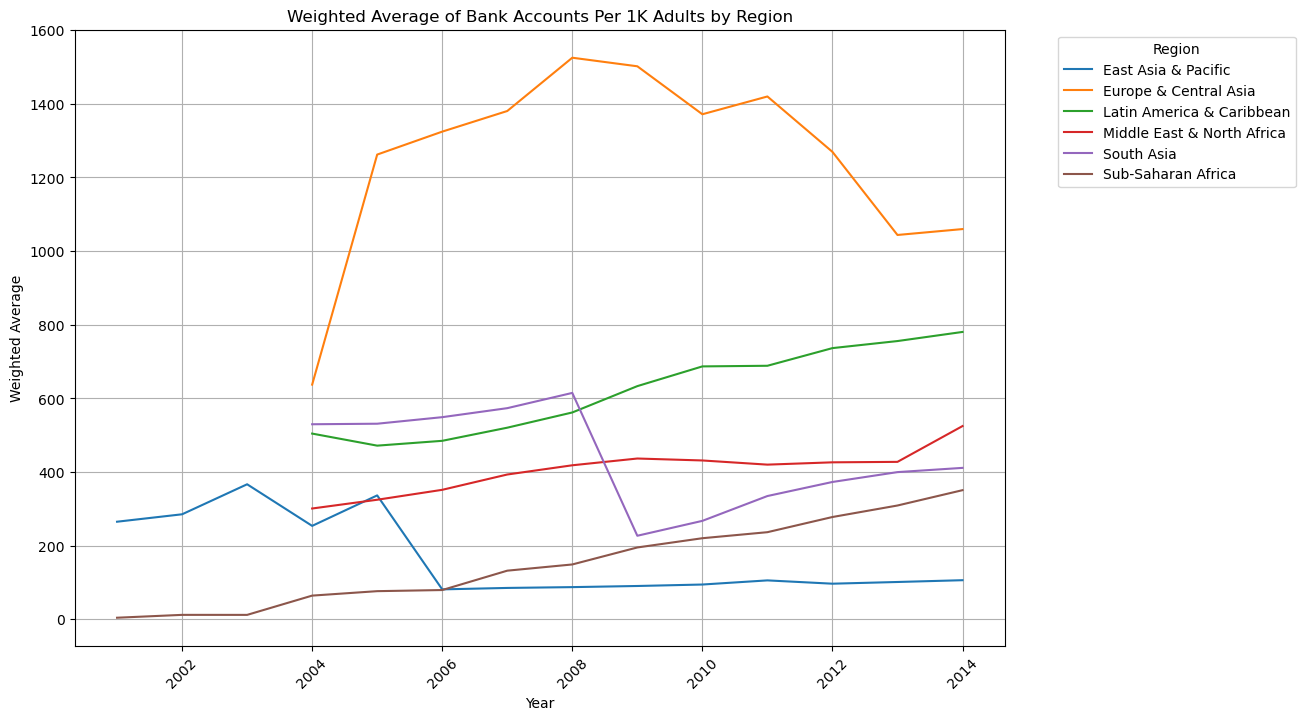

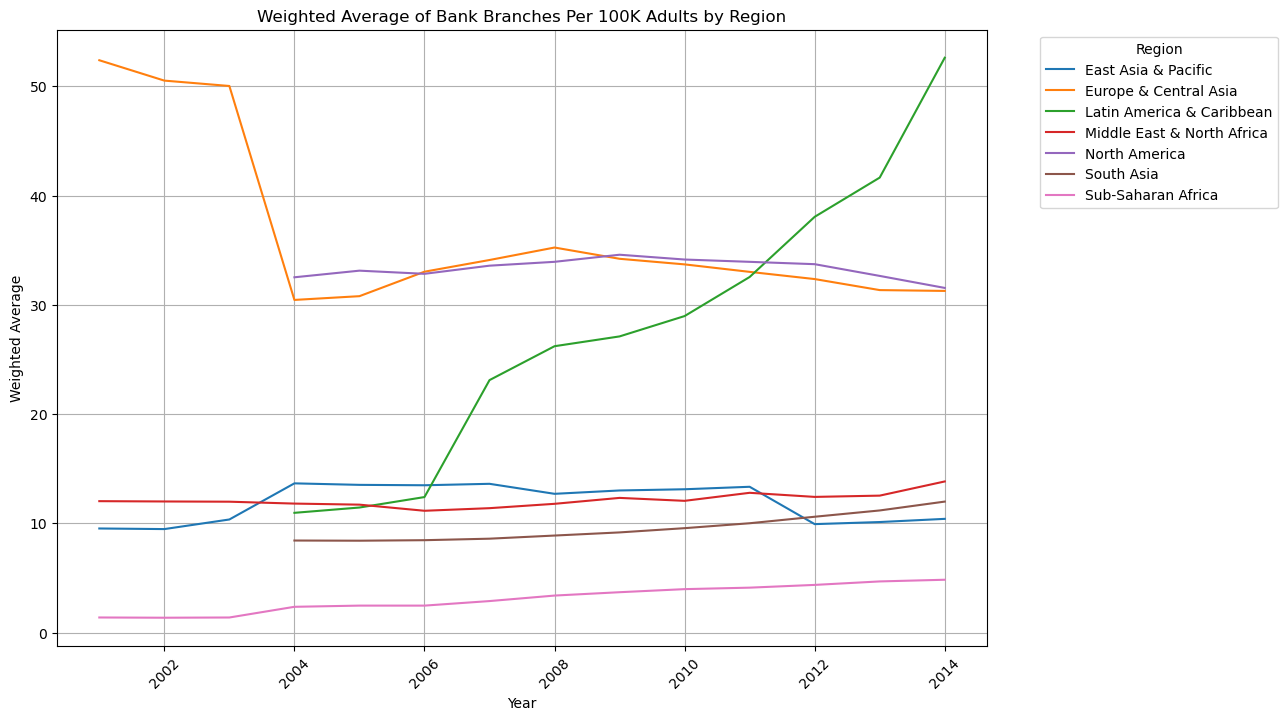

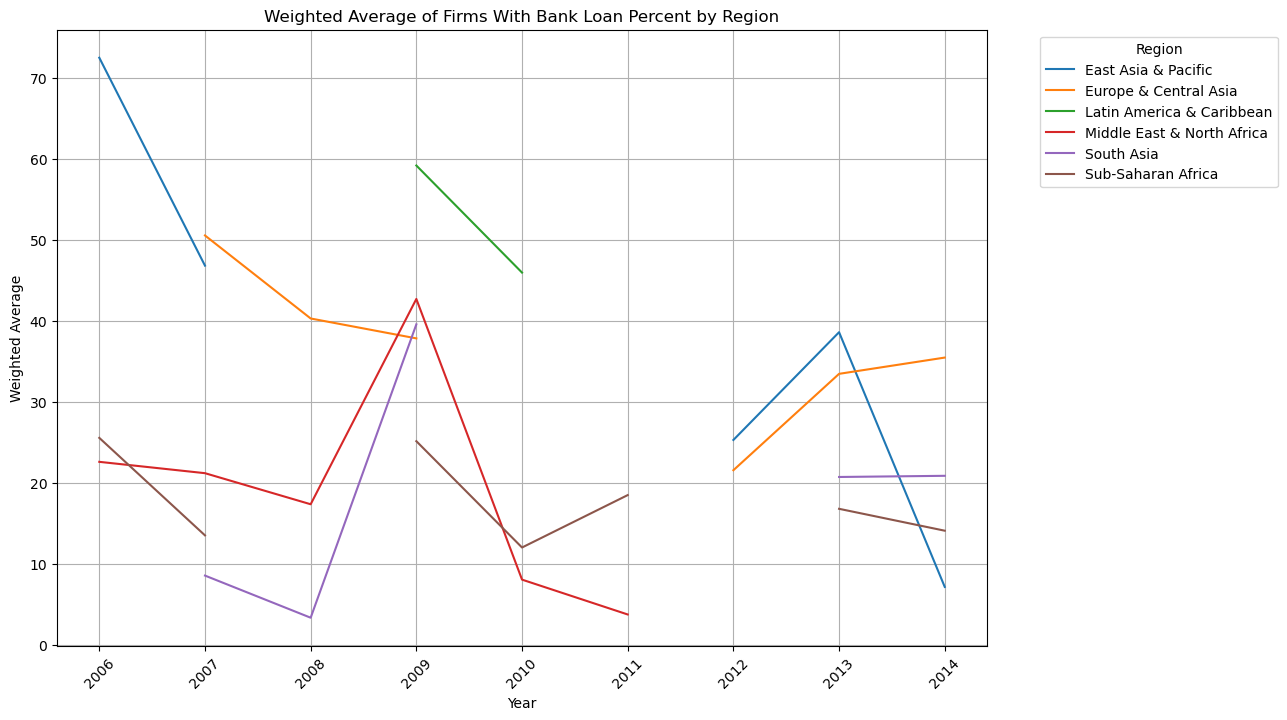

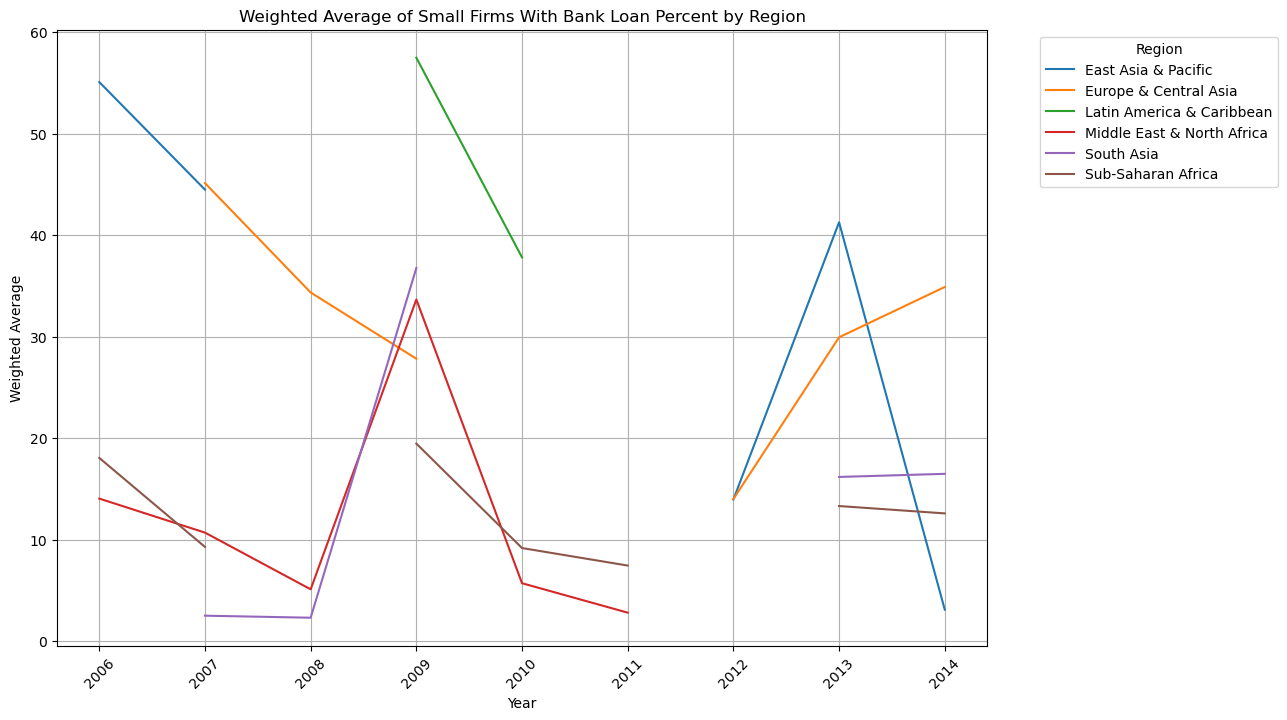

In [16]:
access_indicators = [
    "bank_accounts_per_1k_adults",
    "bank_branches_per_100k_adults",
    "firms_with_bank_loan_percent",
    "small_firms_with_bank_loan_percent"
]

weighted_df = pd.DataFrame()
for i in access_indicators:
    df_weighted = (
        df.loc[:, ["Year", "Country", "Region", "population_total", i]]
        .dropna(subset=[i])
    )
    df_weighted["weight"] = df_weighted.groupby(["Year", "Region"])["population_total"].transform(lambda x: x / x.sum())

    df_weighted[f"{i}_weighted"] = df_weighted[i] * df_weighted["weight"]

    weighted_avg = (
        df_weighted.groupby(["Year", "Region"])[f"{i}_weighted"]
        .sum()
        .rename("value")
        .reset_index()
    )

    weighted_avg_pivot = weighted_avg.pivot(index="Year", columns="Region", values="value")
    weighted_avg_pivot.columns.name = None 

    weighted_avg_pivot = weighted_avg_pivot.rename_axis(None, axis=1)
    weighted_avg_pivot.columns = pd.MultiIndex.from_product([[i], weighted_avg_pivot.columns])

    if weighted_df.empty:
        weighted_df = weighted_avg_pivot
    else:
        weighted_df = pd.concat([weighted_df, weighted_avg_pivot], axis=1)

for col in access_indicators:
    feature_pivot = weighted_df[col]
    
    feature_pivot.plot(kind='line', figsize=(12, 8))
    
    plt.title(f'Weighted Average of {col.replace("_", " ").title()} by Region')
    plt.xlabel('Year')
    plt.ylabel('Weighted Average')
    plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.grid()
    
    plt.show()    

## Limited Interpretability Due to Missing Data:
The graphs generated from this approach are not interpretable due to a high volume of missing values across the dataset. For instance, the first graph, representing bank accounts per 1,000 inhabitants, was from the Core-Econ website. However, it excludes North America entirely because of missing data. This omission creates an incomplete picture, making meaningful regional comparisons impossible and introducing bias into the analysis.

Given the significant data gaps, relying on this approach would lead to skewed conclusions. Therefore, we have decided to abandon this method in favor of one that ensures more consistent and complete data coverage across all regions.

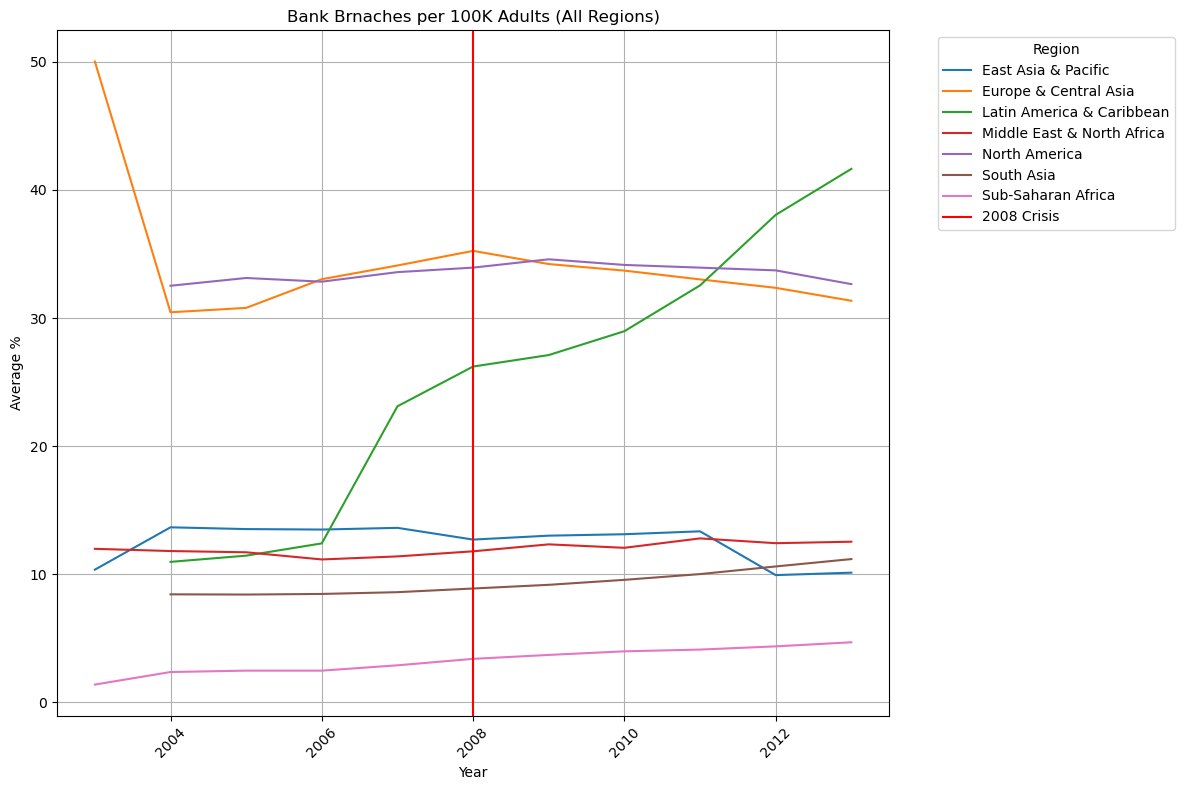

In [ ]:
feature = 'bank_branches_per_100k_adults'

feature_pivot = weighted_df[feature]
feature_pivot = feature_pivot[(feature_pivot.index > 2002) & (feature_pivot.index < 2014)]

plt.figure(figsize=(12, 8))

for region in feature_pivot.columns:
    plt.plot(
        feature_pivot.index, 
        feature_pivot[region], 
        label=region
    )

plt.axvline(x=2008, color='red', linestyle='-', label='2008 Crisis')

plt.title(f'Bank Branches per 100K Adults (All Regions)')
plt.xlabel('Year')
plt.ylabel('Weighted Average %')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Inrerpretation: 
- We can notice a constant growth of Latin America in its access to financial institutions. These values are weighted by the population of each countries to be comparable.

# Depth

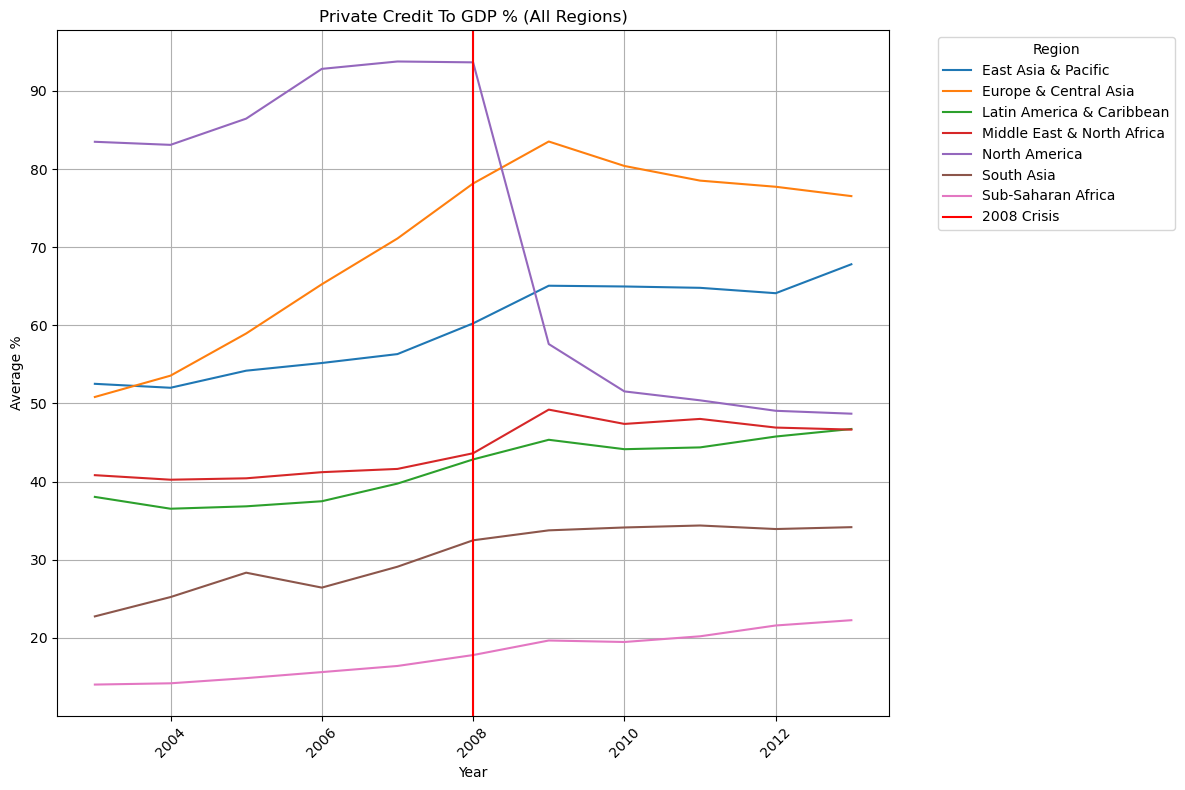

In [ ]:
feature = 'private_credit_to_gdp_percent'

df_with_feature = melt_dataframe(df, [feature])

df_with_feature = df_with_feature[(df_with_feature['Year'] > 2002) & (df_with_feature['Year'] < 2014)]
df_with_feature = df_with_feature.groupby(['Year', 'Region'])['value'].mean().unstack()

plt.figure(figsize=(12, 8))

for region in df_with_feature.columns:
    plt.plot(
        df_with_feature.index, 
        df_with_feature[region], 
        label=region
    )

plt.axvline(x=2008, color='red', linestyle='-', label='2008 Crisis')

plt.title(f'Private Credit To GDP % (All Regions)')
plt.xlabel('Year')
plt.ylabel('Average %')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
percent_change = df_with_feature.pct_change().loc[2007:2009] * 100
percent_change

Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
Year,,,,,,,
2007,2.067095,8.983154,6.025309,1.008639,1.019542,10.112962,5.023513
2008,6.982193,9.897551,7.787660,4.819248,-0.117534,11.624415,8.511365
2009,7.996087,6.875635,5.867756,12.801189,-38.496309,3.916859,10.468389


## Interpretation:
- 2008 Crisis Impact: A sharp decline in private credit to GDP percentage is evident in regions like Europe & Central Asia and Middle East & North Africa after the 2008 financial crisis, reflecting the economic shock.

- Divergent Regional Trends: Europe & Central Asia maintained the highest levels of private credit, whereas Sub-Saharan Africa and South Asia show steady but low growth, highlighting regional disparities.

- North America's Drop: North America experienced a steep drop in private credit after 2008, indicating significant credit contraction during the crisis.

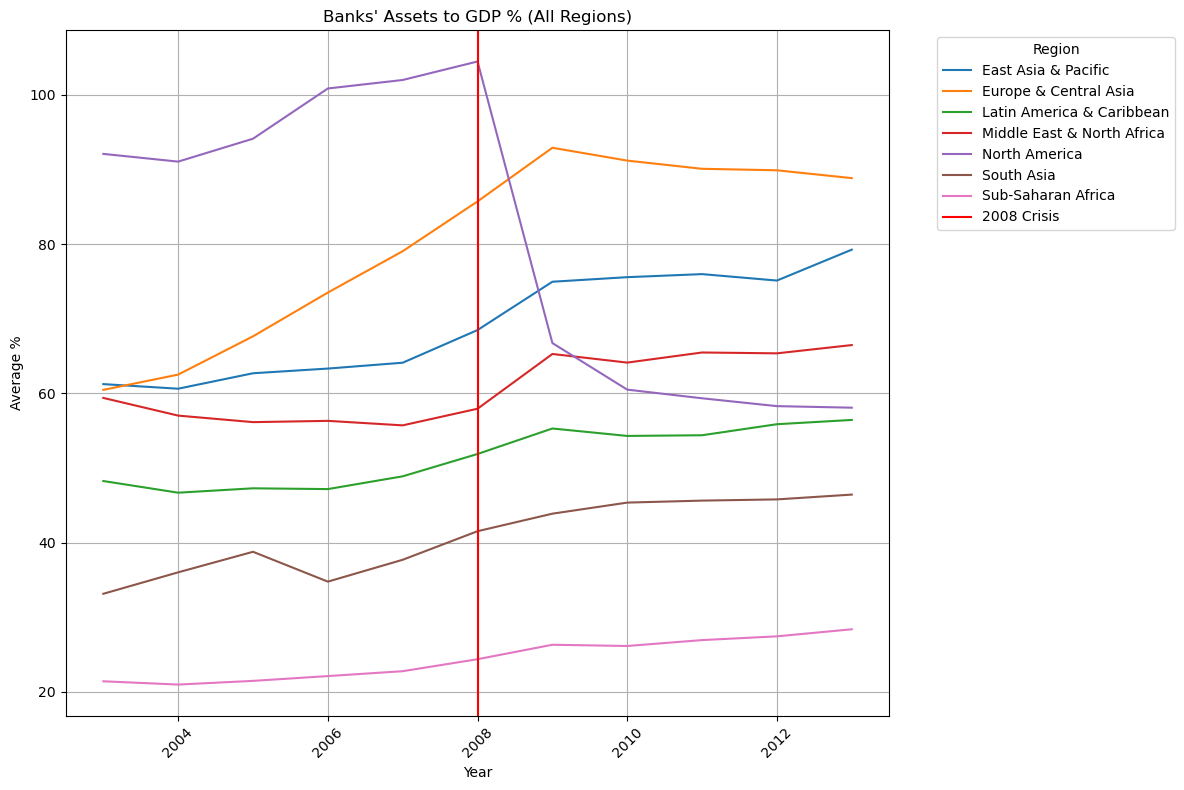

In [ ]:
feature = 'deposit_money_banks_assets_to_gdp_percent'

df_with_feature = melt_dataframe(df, [feature])
df_with_feature = df_with_feature[(df_with_feature['Year'] > 2002) & (df_with_feature['Year'] < 2014)]
df_with_feature = df_with_feature.groupby(['Year', 'Region'])['value'].mean().unstack()

plt.figure(figsize=(12, 8))

for region in df_with_feature.columns:
    plt.plot(
        df_with_feature.index, 
        df_with_feature[region], 
        label=region
    )

plt.axvline(x=2008, color='red', linestyle='-', label='2008 Crisis')

plt.title(f"Banks' Assets to GDP % (All Regions)")
plt.xlabel('Year')
plt.ylabel('Average %')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
percent_change = df_with_feature.pct_change().loc[2007:2009] * 100
percent_change

Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
Year,,,,,,,
2007,1.237436,7.537855,3.625602,-1.068898,1.127934,8.420712,2.963686
2008,6.826866,8.436338,6.120565,3.997509,2.430670,10.149028,7.041935
2009,9.451458,8.388776,6.584251,12.661003,-36.113208,5.655400,7.939029


## Interpretation: 
- 2008 Crisis Impact: Similar to private credit, the 2008 crisis caused a sharp decline in banks' assets to GDP in regions like North America, Europe & Central Asia, and Middle East & North Africa, reflecting the financial system's contraction.

- Regional Disparities: Europe & Central Asia shows the highest banks' assets to GDP percentage, with steady growth until 2008, while Sub-Saharan Africa and South Asia exhibit slow but consistent increases, highlighting unequal financial development.

- Parallel to Private Credit Trends: The trends in this graph mirror those in private credit to GDP, emphasizing the strong correlation between banks' assets and credit availability as indicators of financial sector health.

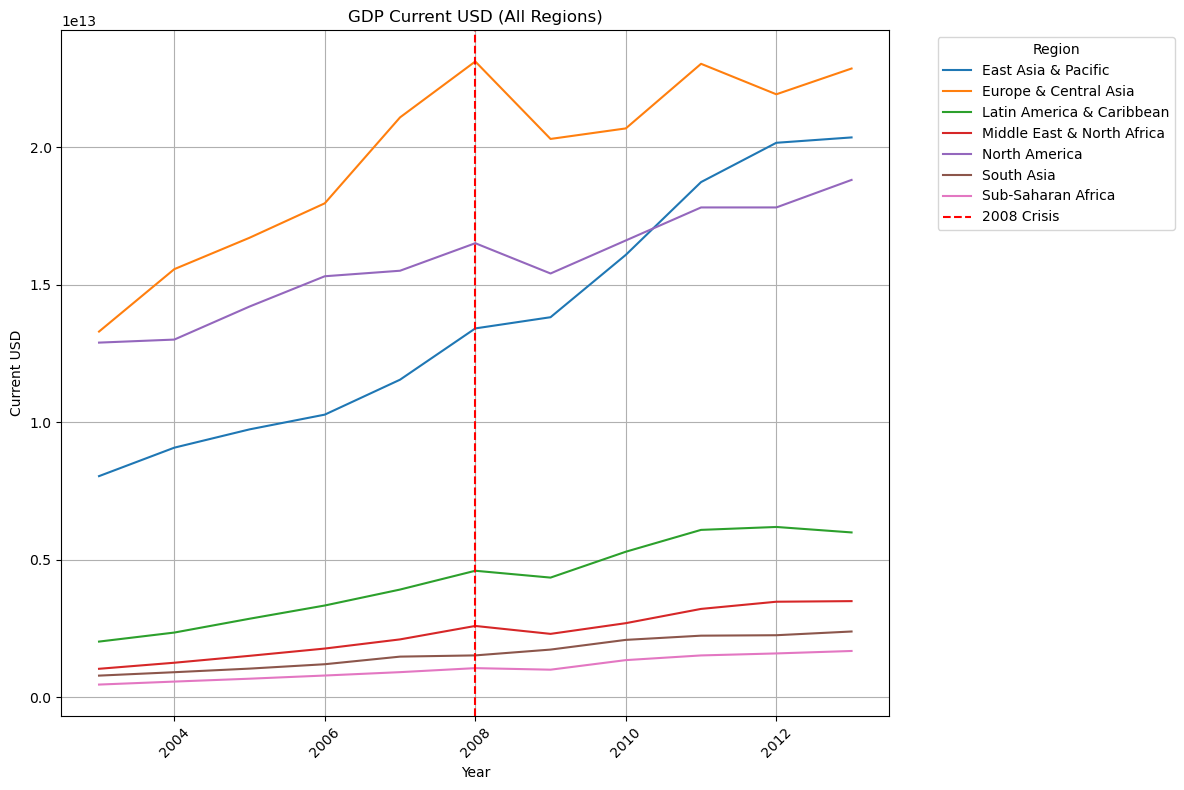

In [ ]:
feature = 'gdp_current_usd'

df_with_feature = melt_dataframe(df, [feature])
df_with_feature = df_with_feature[(df_with_feature['Year'] > 2002) & (df_with_feature['Year'] < 2014)]
df_with_feature = df_with_feature.groupby(['Year', 'Region'])['value'].sum().unstack()

plt.figure(figsize=(12, 8))

for region in df_with_feature.columns:
    plt.plot(
        df_with_feature.index, 
        df_with_feature[region], 
        label=region
    )

plt.axvline(x=2008, color='red', linestyle='--', label='2008 Crisis')

plt.title(f'GDP Current USD (All Regions)')
plt.xlabel('Year')
plt.ylabel('Current USD')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
percent_change = df_with_feature.pct_change().loc[2007:2009] * 100
percent_change

Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
Year,,,,,,,
2007,12.349831,17.386026,17.334263,18.715799,1.309995,22.854779,15.383651
2008,16.135993,9.636771,17.413577,23.139967,6.450448,3.010709,15.836003
2009,3.034768,-12.176747,-5.396319,-11.076059,-6.666020,13.802798,-5.286154


<Axes: xlabel='Year'>

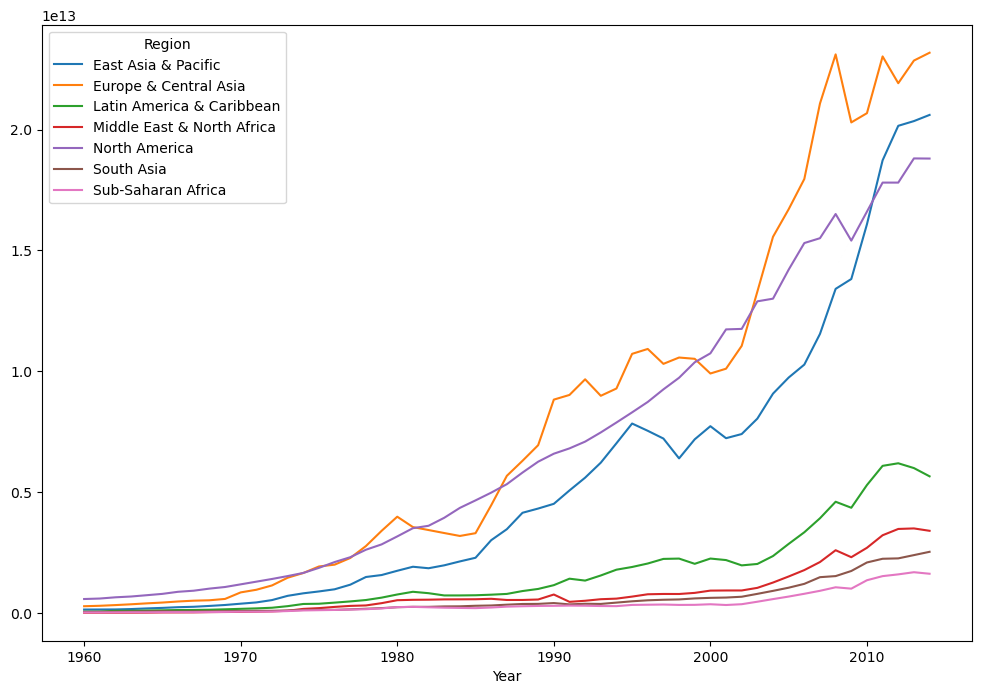

In [ ]:
feature = 'gdp_current_usd'

df_with_feature = melt_dataframe(df, [feature])

df_with_feature.groupby(['Year', 'Region'])['value'].sum().unstack().plot(kind='line', figsize=(12, 8))

# Stability

/Users/armandhubler/Documents/Python/kaggle_regression_competition/.conda/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


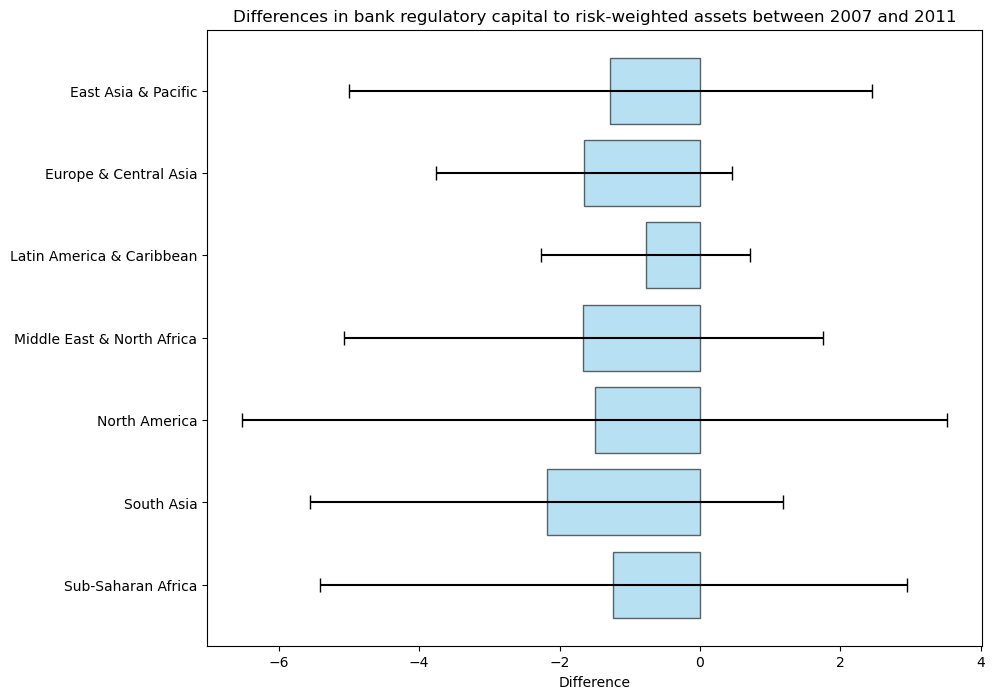

In [ ]:
rwa_07_14 = df.loc[
    df["Year"].isin([2007, 2011]),
    ["Year", "Region", "Country", "bank_regulatory_capital_to_risk_assets_percent"],
].pivot(index=["Region", "Country"], columns=["Year"], values=["bank_regulatory_capital_to_risk_assets_percent"])

rwa_07_14_ttest = rwa_07_14.groupby("Region").apply(
    lambda row: pg.ttest(
        row[("bank_regulatory_capital_to_risk_assets_percent", 2007)], row[("bank_regulatory_capital_to_risk_assets_percent", 2011)]
    )
)

rwa_07_14_ttest = pd.concat(
    [
        rwa_07_14_ttest,
        pd.DataFrame(
            rwa_07_14_ttest["CI95%"].tolist(),
            columns=["lower", "upper"],
            index=rwa_07_14_ttest.index,
        ),
    ],
    axis=1,
)
rwa_07_14_ttest["mean"] = rwa_07_14_ttest[["lower", "upper"]].mean(axis=1)
rwa_07_14_ttest["width"] = (
    rwa_07_14_ttest[["lower", "upper"]].diff(axis=1).dropna(axis=1) / 2
)

rwa_07_14_ttest_reset = rwa_07_14_ttest.dropna(subset=['mean', 'lower', 'upper']).reset_index()

regions = rwa_07_14_ttest_reset['Region']
means = rwa_07_14_ttest_reset['mean']
lower_bounds = rwa_07_14_ttest_reset['lower']
upper_bounds = rwa_07_14_ttest_reset['upper']
errors = [means - lower_bounds, upper_bounds - means]

plt.figure(figsize=(10, 8))
plt.barh(regions, means, xerr=errors, capsize=5, color='skyblue', edgecolor='black', alpha=0.6)
plt.xlabel('Difference')
plt.title('Differences in bank regulatory capital to risk-weighted assets between 2007 and 2011')
plt.gca().invert_yaxis()  
plt.show()

## Interpretation: 
- **Explanation of the Graph Components:**
    - Blue Boxes: Represent the mean difference in bank regulatory capital to risk-weighted assets between 2007 and 2011. These values indicate whether banks increased or decreased their relative capital buffers over this period.
    - Black Horizontal Lines: Show the 95% confidence intervals for the differences. A wider black line indicates greater variability or uncertainty in the difference.

- **Analysis of the Graph:**
    - Regional Variability:

        - North America exhibits the widest confidence interval, suggesting significant variability in how banks adjusted their capital relative to assets post-crisis.

    - Negative Mean Differences:

        - Negative differences, observed in regions like North America and East Asia & Pacific, suggest a relative decrease in regulatory capital, increasing insolvency risks during this period.

    - Impact of Post-Crisis Regulations:

        - The stricter capital requirements introduced under Basel III reforms (e.g., Tier 1 capital rising from 4% to 6%) likely influenced the adjustments across regions, but the extent and consistency varied significantly. Regions with positive differences may reflect quicker regulatory compliance or stronger financial recovery efforts.

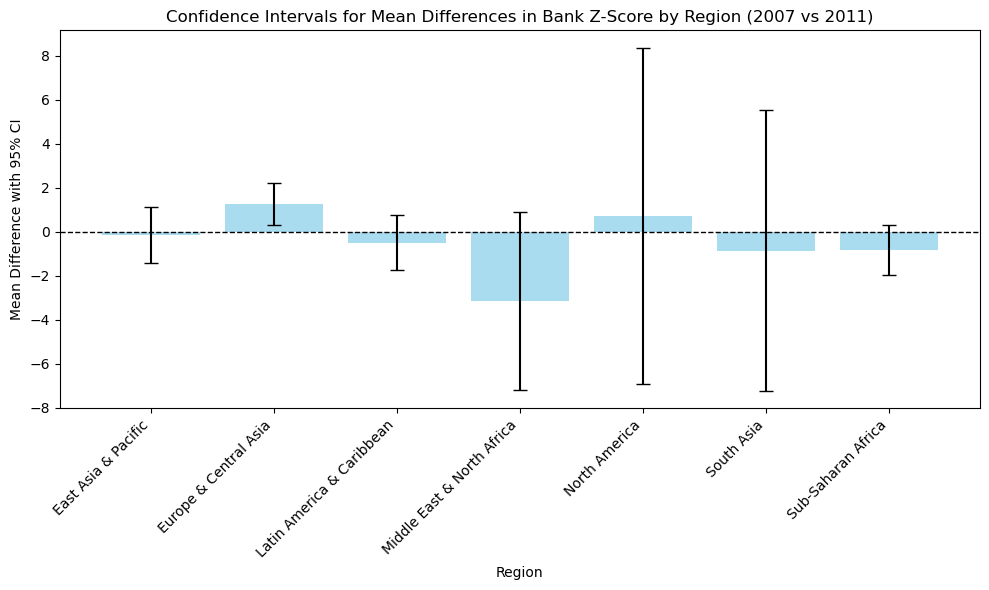

In [ ]:
feature_to_analyze = 'bank_z_score'

pivoted_rwa = df.loc[
    df["Year"].isin([2007, 2011]),
    ["Year", "Region", "Country", feature_to_analyze],
].pivot(index=["Region", "Country"], columns=["Year"], values=[feature_to_analyze])

cleaned_rwa = pivoted_rwa.dropna()

ttest_results_by_region = cleaned_rwa.groupby("Region").apply(
    lambda region_data: pg.ttest(
        region_data[(feature_to_analyze, 2007)], region_data[(feature_to_analyze, 2011)], paired=True
    )
)

regions_list = ttest_results_by_region.index.get_level_values(0)
confidence_intervals = ttest_results_by_region['CI95%']

ci_lower_bounds = [ci[0] for ci in confidence_intervals]
ci_upper_bounds = [ci[1] for ci in confidence_intervals]

mean_differences = [(lower + upper) / 2 for lower, upper in zip(ci_lower_bounds, ci_upper_bounds)]
error_margins = [(upper - lower) / 2 for lower, upper in zip(ci_lower_bounds, ci_upper_bounds)]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(regions_list, mean_differences, yerr=error_margins, capsize=5, alpha=0.7, color='skyblue')

plt.ylabel('Mean Difference with 95% CI')
plt.axhline(y=0, color='black', linestyle='--', lw=1)  
plt.xlabel('Region')
plt.title('Confidence Intervals for Mean Differences in Bank Z-Score by Region (2007 vs 2011)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Interpretation:

- Regional Variability: North America and South Asia display the largest confidence intervals, indicating high variability in changes to the bank Z-score between 2007 and 2011.

- Negative Differences: Regions like South Asia and Sub-Saharan Africa exhibit negative mean differences, showing a decline in financial stability during this period. This contrasts with positive changes in regions like Europe & Central Asia and Latin America & Caribbean. 

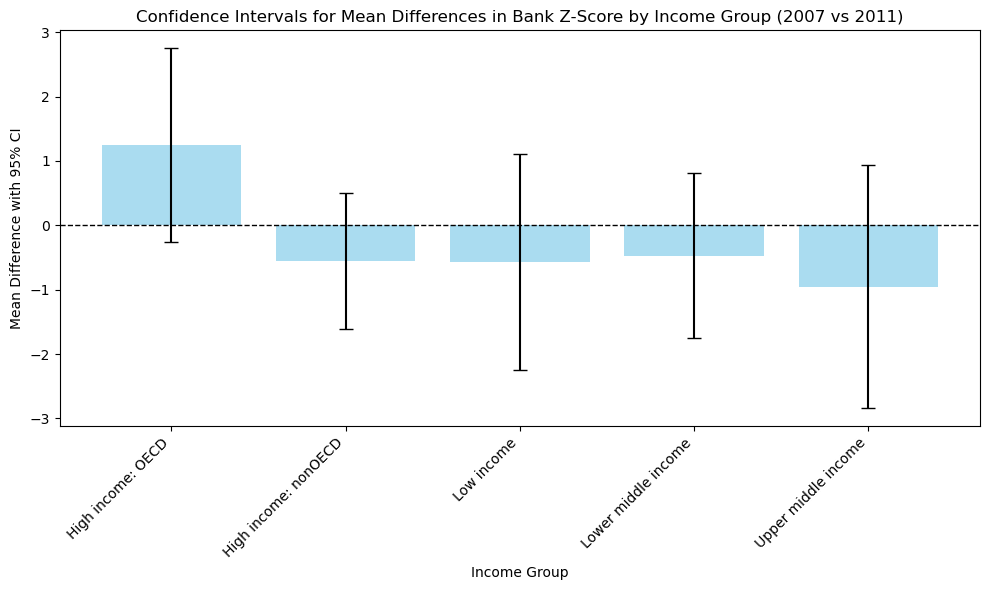

In [ ]:
feature_to_analyze = 'bank_z_score'

pivoted_rwa = df.loc[
    df["Year"].isin([2007, 2011]),
    ["Year", "Income Group", "Country", feature_to_analyze],
].pivot(index=["Income Group", "Country"], columns=["Year"], values=[feature_to_analyze])

cleaned_rwa = pivoted_rwa.dropna()

ttest_results_by_region = cleaned_rwa.groupby("Income Group").apply(
    lambda region_data: pg.ttest(
        region_data[(feature_to_analyze, 2007)], region_data[(feature_to_analyze, 2011)], paired=True
    )
)

regions_list = ttest_results_by_region.index.get_level_values(0)
confidence_intervals = ttest_results_by_region['CI95%']

ci_lower_bounds = [ci[0] for ci in confidence_intervals]
ci_upper_bounds = [ci[1] for ci in confidence_intervals]

mean_differences = [(lower + upper) / 2 for lower, upper in zip(ci_lower_bounds, ci_upper_bounds)]
error_margins = [(upper - lower) / 2 for lower, upper in zip(ci_lower_bounds, ci_upper_bounds)]

plt.figure(figsize=(10, 6))
plt.bar(regions_list, mean_differences, yerr=error_margins, capsize=5, alpha=0.7, color='skyblue')
plt.axhline(y=0, color='black', linestyle='--', lw=1)  
plt.ylabel('Mean Difference with 95% CI')
plt.xlabel('Income Group')
plt.title('Confidence Intervals for Mean Differences in Bank Z-Score by Income Group (2007 vs 2011)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Interpretation: 
- Income Group Variability: High-income OECD countries show a positive mean difference with narrow confidence intervals, indicating improved financial stability between 2007 and 2011. In contrast, low and middle-income groups display negative differences, suggesting a decline in stability.

- Uncertainty in Lower-Middle and Upper-Middle Income Groups: These groups exhibit wider confidence intervals, reflecting variability and uncertainty in how their banks adjusted to post-crisis conditions.

In [ ]:
def correlation_heatmap(df, columns, title):
    plt.figure(figsize=(10, 6))
    corr = df[columns].corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
    plt.title(title)
    plt.show()

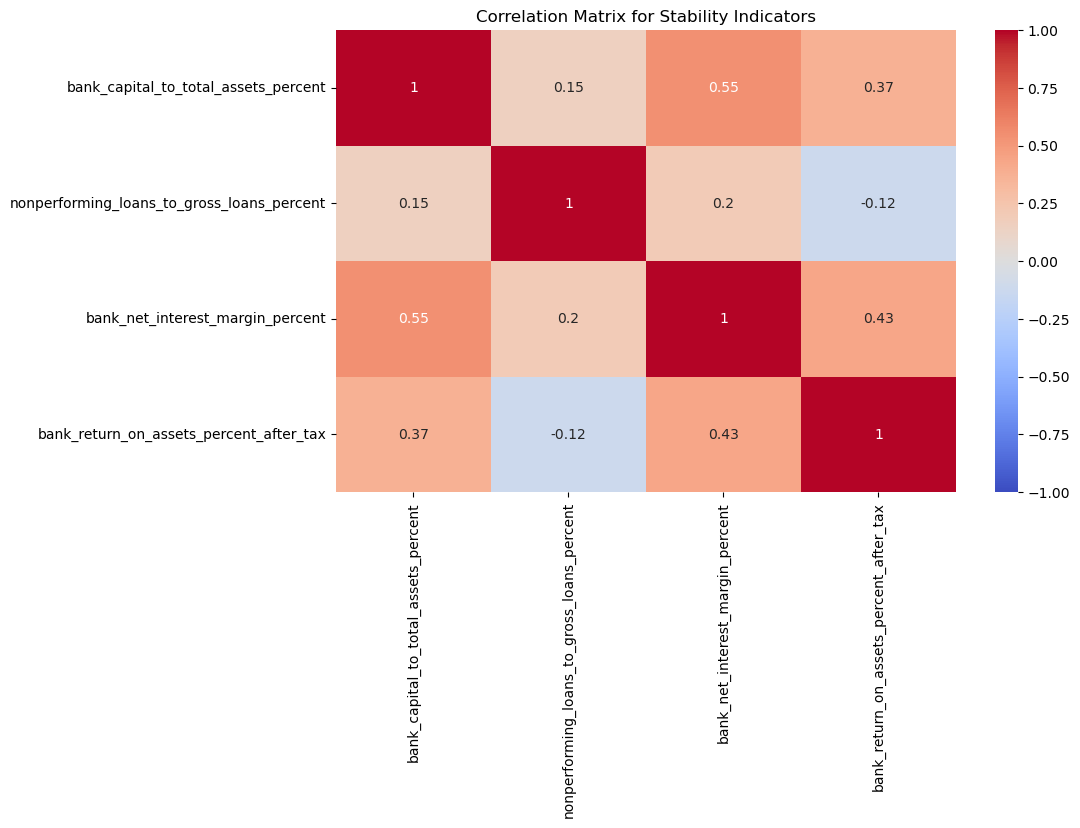

In [ ]:
stability_columns = [
    "bank_capital_to_total_assets_percent",
    "nonperforming_loans_to_gross_loans_percent",
    "bank_net_interest_margin_percent",
    "bank_return_on_assets_percent_after_tax"
]
correlation_heatmap(df, stability_columns, "Correlation Matrix for Stability Indicators")


# Interpretation: 
- Positive Correlations Among Profitability Indicators:

    - There is a moderate positive correlation between bank net interest margin percent and bank return on assets percent after tax (0.43), indicating that higher interest margins are associated with better returns on assets.

- Weak Correlation with Nonperforming Loans:

    - Nonperforming loans to gross loans percent show a weak or negative correlation with other indicators, such as a slight negative correlation with bank return on assets (-0.12). This suggests that higher nonperforming loans are associated with lower profitability.

- Bank Capital and Profitability:

    - Bank capital to total assets percent is moderately correlated with net interest margin (0.55) and return on assets (0.37), highlighting its role in supporting financial performance while maintaining stability.

# Indexes

**In this section we will try to recreate the indexes graph appering on the Benchmarking Financial Systems
around the World paper from the World Bank**

To do so we will use the variables mentioned on the paper that are available in our dataset. The list can be find the table below provided by the paper:

![Financial Systems](../images/list_features.png)

/var/folders/p1/vj5nk3dj08nbdgjg1lst8k_w0000gn/T/ipykernel_1659/2130259835.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = winsorize_series(df[col])
/var/folders/p1/vj5nk3dj08nbdgjg1lst8k_w0000gn/T/ipykernel_1659/2130259835.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = (df[col] - df[col].mean()) / df[col].std()
/var/folders/p1/vj5nk3dj08nbdgjg1lst8k_w0000gn/T/ipykernel_1659/2130259835.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

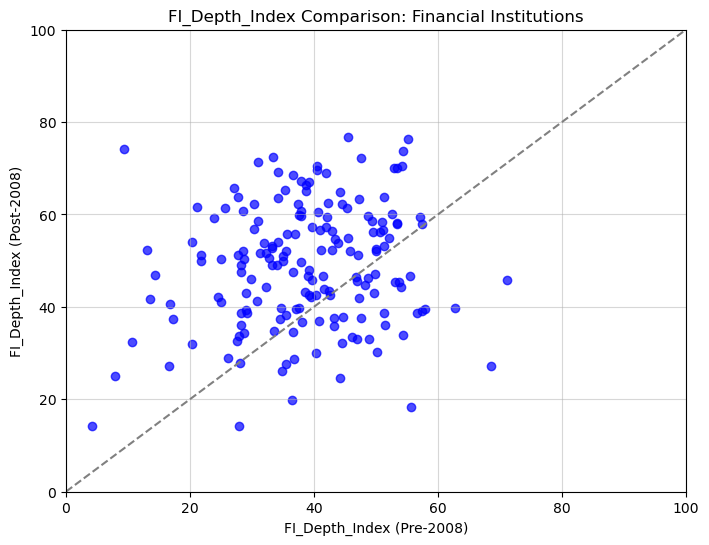

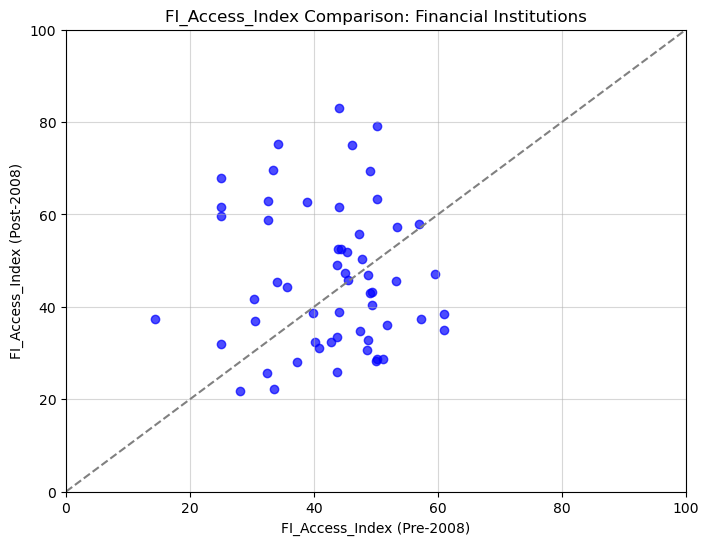

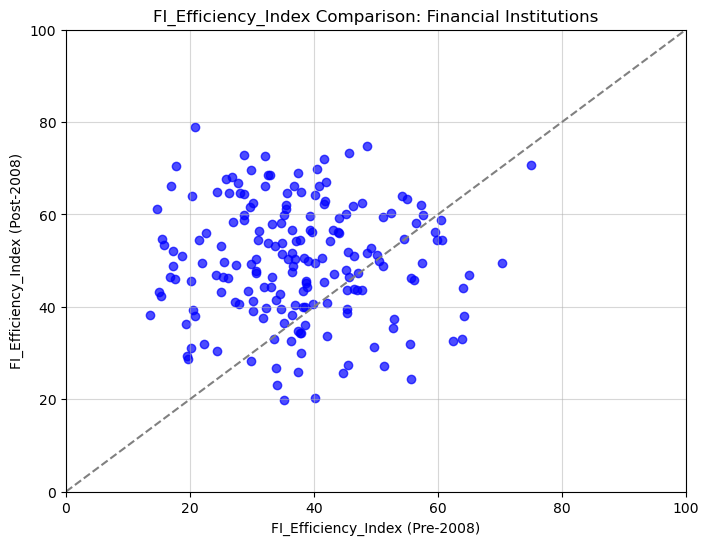

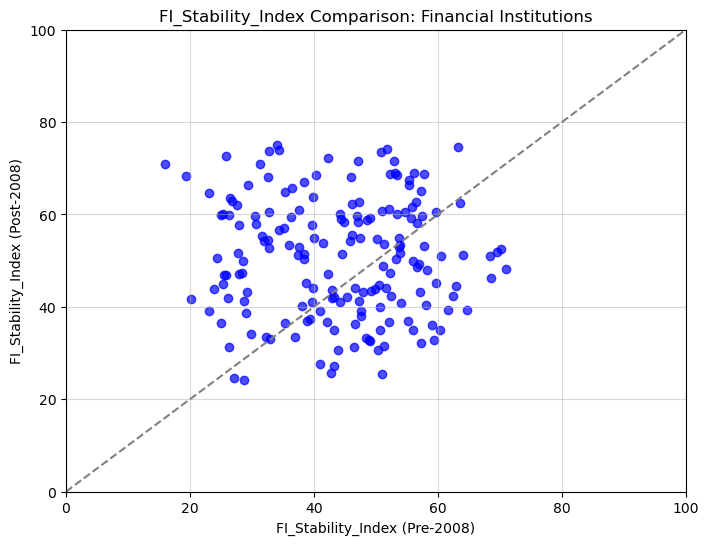

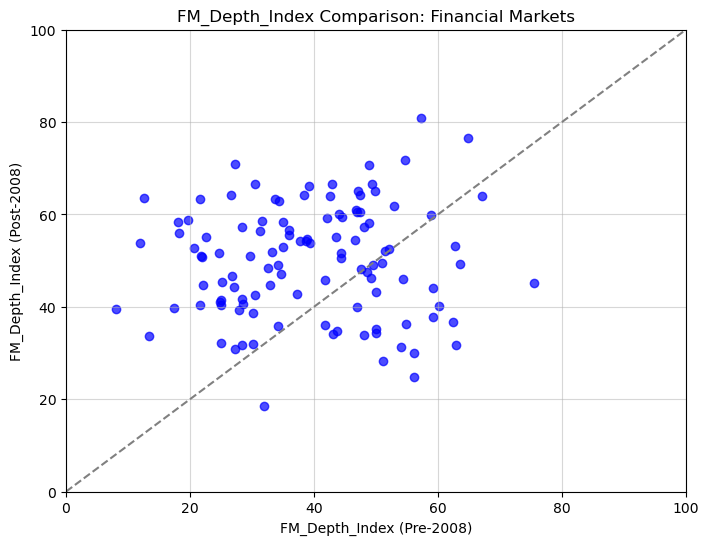

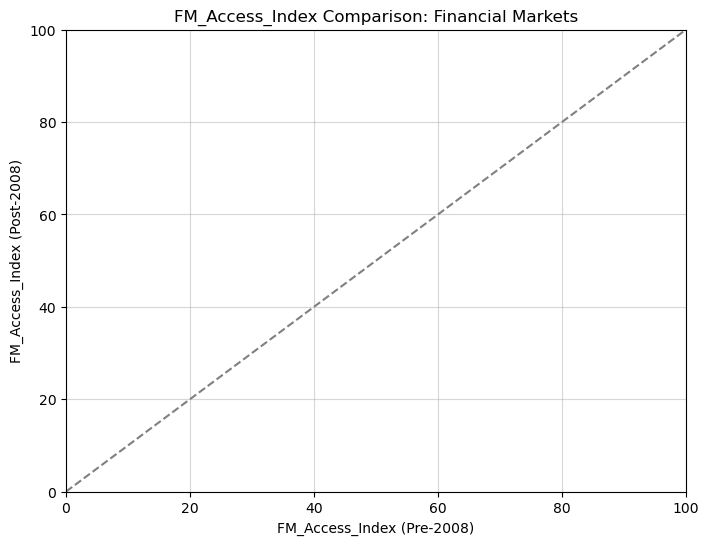

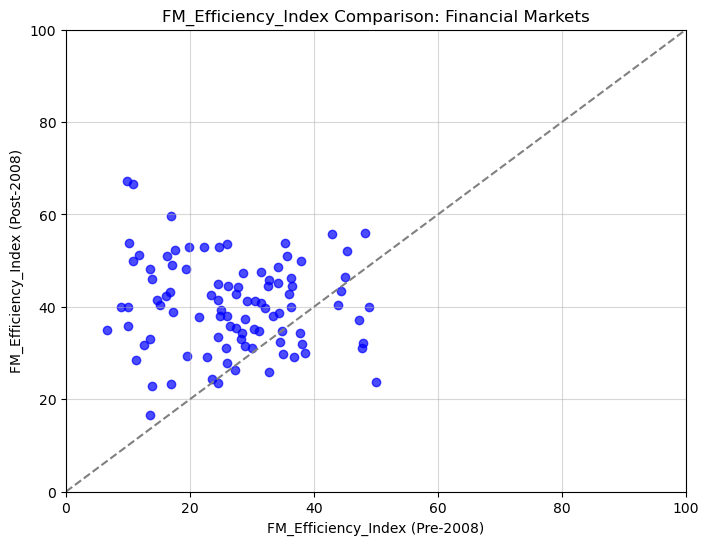

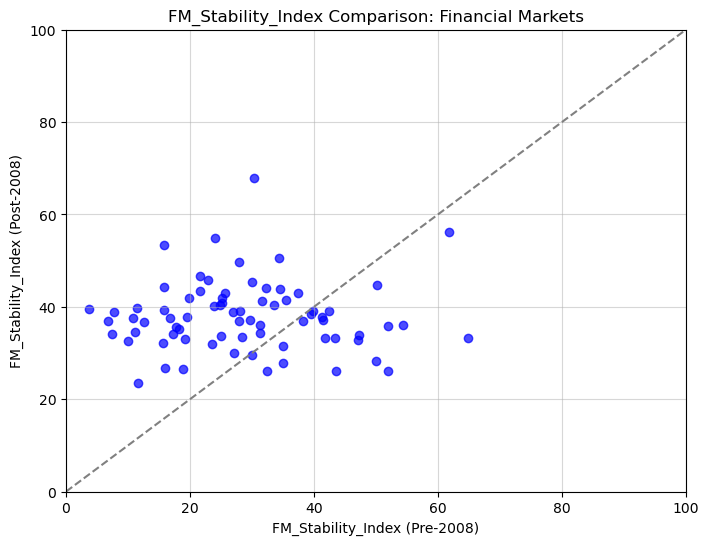

In [15]:
def winsorize_series(series, lower=0.05, upper=0.95):
    """Winsorize a Pandas Series to limit extreme values."""
    return mstats.winsorize(series, limits=(lower, 1 - upper))

def calculate_rescaled_index(df, columns, index_name):
    """
    Calculate an index after rescaling, winsorizing, and normalizing the specified columns.
    The final index is scaled between 0 and 100.
    """
    valid_columns = [col for col in columns if col in df.columns]
    if not valid_columns:
        print(f"No valid columns for {index_name}. Skipping...")
        return df
    
    # Winsorize and normalize each column
    for col in valid_columns:
        df[col] = winsorize_series(df[col])
        df[col] = (df[col] - df[col].mean()) / df[col].std()  

    df[index_name] = df[valid_columns].mean(axis=1)

    df[index_name] = df.groupby(["Country"])[index_name].transform(
        lambda x: ((x - x.min()) / (x.max() - x.min())) * 100
    )
    return df

def calculate_institution_indices(df):
    # Depth
    depth_columns = [
        "private_credit_to_gdp_percent",
        "deposit_money_banks_assets_to_gdp_percent"
    ]
    df = calculate_rescaled_index(df, depth_columns, "FI_Depth_Index")
    
    # Access
    access_columns = [
        "bank_accounts_per_1k_adults",
        "bank_branches_per_100k_adults",
        "adults_with_account_percent",
        "firms_with_bank_loan_percent",
        "small_firms_with_bank_loan_percent"
    ]
    df = calculate_rescaled_index(df, access_columns, "FI_Access_Index")
    
    # Efficiency
    efficiency_columns = [
        "bank_net_interest_margin_percent",
        "bank_lending_deposit_spread",
        "bank_noninterest_income_percent",
        "bank_overhead_costs_percent",
        "bank_return_on_assets_percent_after_tax",
        "bank_return_on_equity_percent_after_tax"
    ]
    df = calculate_rescaled_index(df, efficiency_columns, "FI_Efficiency_Index")
    
    # Stability
    stability_columns = [
        "bank_z_score",
        "bank_regulatory_capital_to_risk_assets_percent",
        "liquid_assets_to_deposits_percent",
        "nonperforming_loans_to_gross_loans_percent"
    ]
    df = calculate_rescaled_index(df, stability_columns, "FI_Stability_Index")
    
    return df

def calculate_market_indices(df):
    # Depth
    depth_columns = [
        "stock_market_capitalization_to_gdp_percent",
        "domestic_private_debt_securities_to_gdp_percent",
        "domestic_public_debt_securities_to_gdp_percent",
        "international_private_debt_securities_to_gdp_percent",
        "international_public_debt_securities_to_gdp_percent"
    ]
    df = calculate_rescaled_index(df, depth_columns, "FM_Depth_Index")
    
    # Access
    access_columns = [
        "market_cap_excluding_top_10_percent",
        "value_traded_excluding_top_10_percent"
    ]
    df = calculate_rescaled_index(df, access_columns, "FM_Access_Index")
    
    # Efficiency
    efficiency_columns = [
        "stock_market_turnover_ratio_percent"
    ]
    df = calculate_rescaled_index(df, efficiency_columns, "FM_Efficiency_Index")
    
    # Stability
    stability_columns = [
        "stock_price_volatility"
    ]
    df = calculate_rescaled_index(df, stability_columns, "FM_Stability_Index")
    
    return df

# Plot function
def plot_index_comparison(df1, df2, index, title_suffix, period1="Pre-2008", period2="Post-2008"):
    """
    Plot a scatter plot comparing indices between two periods with axes fixed from 0 to 100.
    """
    period1_avg = df1.groupby("Country")[index].mean()
    period2_avg = df2.groupby("Country")[index].mean()
    
    combined = pd.DataFrame({"Period1_Avg": period1_avg, "Period2_Avg": period2_avg}).dropna()
    
    plt.figure(figsize=(8, 6))
    plt.scatter(combined["Period1_Avg"], combined["Period2_Avg"], alpha=0.7, color='blue')
    plt.plot([0, 100], [0, 100], linestyle="--", color="gray")  # Diagonal line
    plt.xlim(0, 100)
    plt.ylim(0, 100)
    plt.xlabel(f"{index} ({period1})")
    plt.ylabel(f"{index} ({period2})")
    plt.title(f"{index} Comparison: {title_suffix}")
    plt.grid(alpha=0.5)
    plt.show()

# Main processing
df_pre_2008 = df[df["Year"] < 2008]
df_post_2008 = df[df["Year"] >= 2008]

df_pre_2008_inst = calculate_institution_indices(df_pre_2008)
df_pre_2008_market = calculate_market_indices(df_pre_2008)

df_post_2008_inst = calculate_institution_indices(df_post_2008)
df_post_2008_market = calculate_market_indices(df_post_2008)


# # Plot all indices
indices = [
    "FI_Depth_Index", "FI_Access_Index", "FI_Efficiency_Index", "FI_Stability_Index",
    "FM_Depth_Index", "FM_Access_Index", "FM_Efficiency_Index", "FM_Stability_Index"
]

for index in indices:
    title_suffix = "Financial Institutions" if "FI" in index else "Financial Markets"
    plot_index_comparison(df_pre_2008, df_post_2008, index, title_suffix)


- Unfortunately, the paper does not explicitly share the methodology used to preprocess and normalize the data after computing the index. 
- Therefore, we adhered to statistical standards by applying winsorization and normalization per country and per year. 
- However, the output did not sufficiently align with the graphs presented in the paper. 
- As a result, we decided not to include our attempts and instead rely on the graphs provided in the paper.